In [4]:
#Step 1 (5 points): 
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from pyvis.network import Network
import altair as alt
import nx_altair as nxa
import csv

In [5]:
#Step 2 ( 5 points): create the Graph. Here is some code to help you with this:
with open ('quakers_nodelist.csv', 'r') as nodecsv:
    nodereader = csv.reader (nodecsv)
    nodes = [n for n in nodereader][1:]

node_names = [n[0] for n in nodes]

with open ('quakers_edgelist.csv', 'r') as edgecsv:
    edgereader = csv.reader (edgecsv)
    edges = [tuple(e) for e in edgereader][1:]

G = nx.Graph()
G.add_nodes_from (node_names)
G.add_edges_from (edges)

In [6]:
#Step 3 (5 points): Print information of the Graph, like the number of nodes and edges
print('Number of nodes: ', len(G.nodes))
print('Number of edges: ', len(G.edges))

Number of nodes:  119
Number of edges:  174


In [7]:
#Step 4 (5 points): Use the function nx.set_node_attributes() to add the attributes to the  nodes. 
#There are six attributes - historical significance, gender, birthday, death day, and id. 
#You must create six dictionaries where the key is the name, and the value is the attribute.

node_names = [n[0] for n in nodes]
attributes = {n[0]: {'Historical Significance': n[1], 'Gender': n[2], 'Birthdate': n[3], 'Deathdate': n[4], 'ID': n[5]} for n in nodes}
G = nx.Graph()
G.add_nodes_from(node_names)
G.add_edges_from(edges)
nx.set_node_attributes(G, attributes)

In [8]:
#Step 5 (5 points):  Print the network density; find the shortest path between 'Margaret Fell' and 'George Whitehead' and print
density = nx.density(G)
print("Network density:", density)

Network density: 0.02478279447372169


In [9]:
names = ("Margaret Fell", "George Whitehead")
ids = [x for x, y in G.nodes(data=True) if x in names]
path = nx.shortest_path(G, source=ids[0], target=ids[1])
print("Shortest path between {} & {}:".format(names[0], names[1]), path)

Shortest path between Margaret Fell & George Whitehead: ['George Whitehead', 'George Fox', 'Margaret Fell']


In [10]:
#Step 6 (5 points):  Find the degree of each node, and add that as an attribute, and print the top 10 nodes by degrees
degrees = dict(G.degree())
nx.set_node_attributes(G, degrees, 'degree')
top_10_nodes = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by degrees:")
for node, degree in top_10_nodes:
    print(f"Node: {node}, Degree: {degree}")

Top 10 nodes by degrees:
Node: George Fox, Degree: 22
Node: William Penn, Degree: 18
Node: James Nayler, Degree: 16
Node: George Whitehead, Degree: 13
Node: Margaret Fell, Degree: 13
Node: Benjamin Furly, Degree: 10
Node: Edward Burrough, Degree: 9
Node: George Keith, Degree: 8
Node: Thomas Ellwood, Degree: 8
Node: Francis Howgill, Degree: 7


In [11]:
#Step 7 (5 points): Find the betweenness centrality and print the top 10 nodes betweenness
betweenness_centrality = nx.betweenness_centrality(G)
top_10_nodes_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by betweenness centrality:")
for node, centrality in top_10_nodes_betweenness:
    print(f"Node: {node}, Betweenness Centrality: {centrality}")

Top 10 nodes by betweenness centrality:
Node: William Penn, Betweenness Centrality: 0.23999456006192205
Node: George Fox, Betweenness Centrality: 0.23683257726065216
Node: George Whitehead, Betweenness Centrality: 0.12632024847366005
Node: Margaret Fell, Betweenness Centrality: 0.12106792237170329
Node: James Nayler, Betweenness Centrality: 0.10446026280446098
Node: Benjamin Furly, Betweenness Centrality: 0.06419626175167242
Node: Thomas Ellwood, Betweenness Centrality: 0.046190623885104545
Node: George Keith, Betweenness Centrality: 0.045006564009171565
Node: John Audland, Betweenness Centrality: 0.04164936340077581
Node: Alexander Parker, Betweenness Centrality: 0.03893676140525336


In [12]:
#Step 7 (5 points): Find the betweenness centrality and print the top 10 nodes betweenness
betweenness_centrality = nx.betweenness_centrality(G)
top_10_nodes_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 nodes by betweenness centrality:")
for node, centrality in top_10_nodes_betweenness:
    print(f"Node: {node}, Betweenness Centrality: {centrality}")

Top 10 nodes by betweenness centrality:
Node: William Penn, Betweenness Centrality: 0.23999456006192205
Node: George Fox, Betweenness Centrality: 0.23683257726065216
Node: George Whitehead, Betweenness Centrality: 0.12632024847366005
Node: Margaret Fell, Betweenness Centrality: 0.12106792237170329
Node: James Nayler, Betweenness Centrality: 0.10446026280446098
Node: Benjamin Furly, Betweenness Centrality: 0.06419626175167242
Node: Thomas Ellwood, Betweenness Centrality: 0.046190623885104545
Node: George Keith, Betweenness Centrality: 0.045006564009171565
Node: John Audland, Betweenness Centrality: 0.04164936340077581
Node: Alexander Parker, Betweenness Centrality: 0.03893676140525336


In [13]:
#Step 8 (5 points): Create a force-directed layout and display
nxa.draw_networkx(G).properties(width=800, height=800)

alt.LayerChart(...)

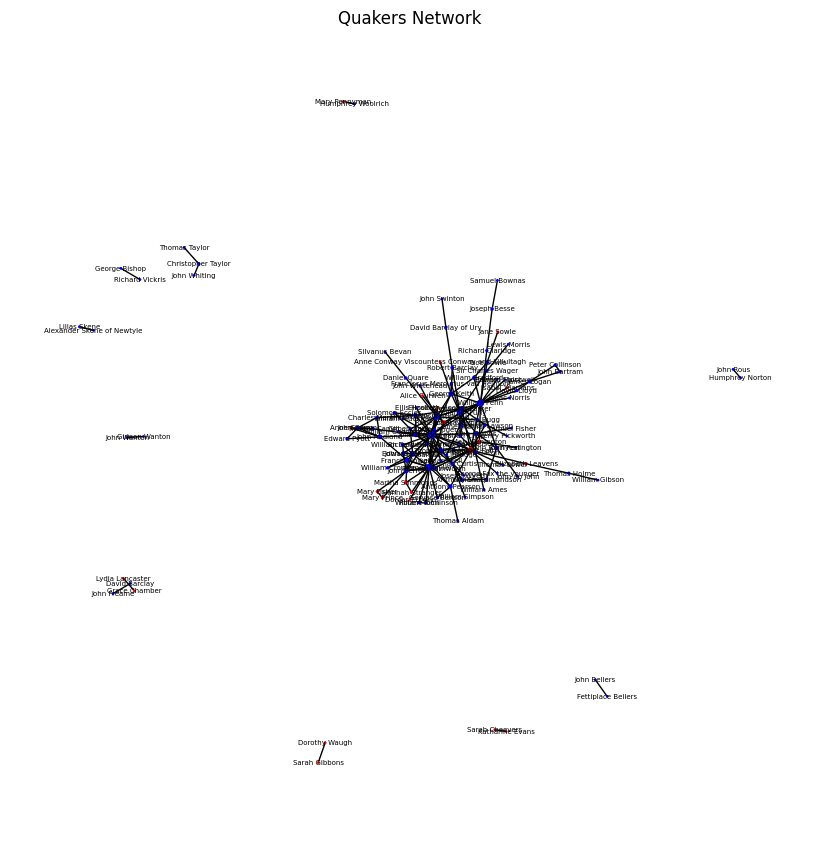

In [14]:
#Step 9 (10 points): Customize the visual encoding by changing the size and color. 
#Let the node_size be equal to the degree, and node_color is blue for males and red for females.

color = ['blue' if G.nodes[node]['Gender'] == 'male' else 'red' for node in G.nodes]
node_sizes = [G.degree(node) for node in G.nodes]

plt.figure(figsize=(8, 8))
nx.draw(G,
        with_labels=True,
        node_color=color,
        node_size=node_sizes,
        font_size=5,
        font_color='black',
        width=1,
        )
plt.title('Quakers Network')
plt.show()